### Model Explainability

import Liberaries

In [1]:
# Step 1: Import Necessary Libraries
import os
import sys
import numpy as np
import pandas as pd
import shap
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

current_dir = os.getcwd()
# Append the parent directory to sys.path
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import warnings 
warnings.filterwarnings('ignore')

/home/gech/10 acadamy/week 8-9/project/adey-ecommerce-banking-fraud-detection/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from scripts.model_explainability import FraudDetectionInterpretability

In [3]:
# Example usage:
data_path = "../data/final_preprocessed_fraud_data.csv"  # Replace with your file path
fraud_interpreter = FraudDetectionInterpretability(data_path)

In [4]:
data = pd.read_csv(data_path)

In [5]:
# Prepare Features and Target
X = data.drop(columns=['class'])  # Features
y = data['class']  # Target variable

# Split the Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model on Full Training Data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Sample 100 Instances for SHAP Analysis
X_test_sample = X_test.sample(100, random_state=42)

In [6]:
# Load, split data, and train the model
fraud_interpreter.load_and_split_data()
fraud_interpreter.train_model()

 94%|=================== | 188/200 [00:13<00:00]       

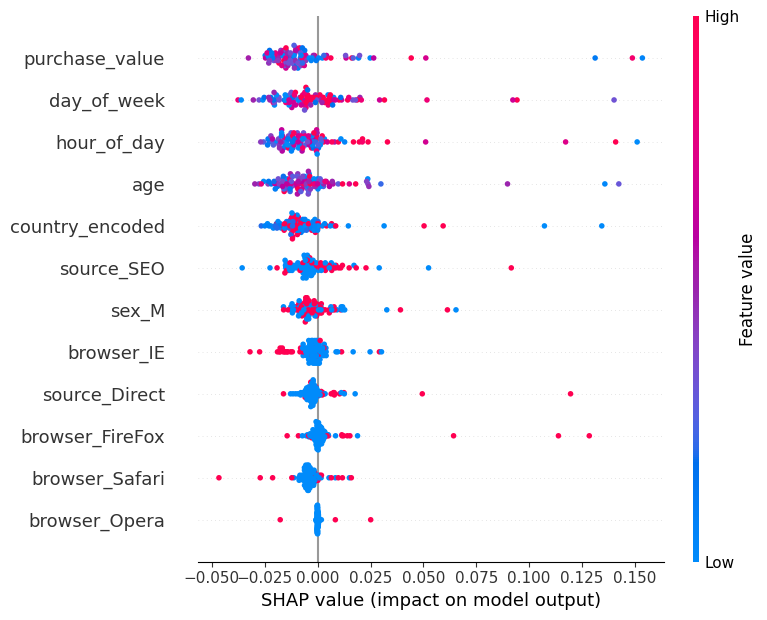

In [7]:
# SHAP analysis and visualizations
shap_values = fraud_interpreter.shap_summary_plot()